In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading

df = pd.read_csv(r"D:\DJ\Innomatics Internship\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
# Checking Data columns and rows

df.shape

(15000, 3)

In [4]:
# Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
# Understanding the Statistical Data

df.describe(include='all')

,order_id,order_placed_at,order_delivered_at
count,1.500000e+04,15000,15000
unique,NaN,14953,15000
top,NaN,2023-03-10 07:39:41,2023-03-01 00:18:07.443132
freq,NaN,2,1
mean,1.530610e+06,NaN,NaN
std,4.330271e+03,NaN,NaN
min,1.523111e+06,NaN,NaN
25%,1.526861e+06,NaN,NaN
50%,1.530610e+06,NaN,NaN
75%,1.534360e+06,NaN,NaN


In [6]:
# Convert the Object column Datatype to Datetime Datatype

df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [7]:
# Feature Engineering (Delivery Time)

df['delivery_time_mints'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60

df[['delivery_time_mints']].head()

,delivery_time_mints
0,17.140719
1,15.598754
2,15.104856
3,38.533657
4,16.176984


In [8]:
# Checking the Null Values Count

df.isnull().sum()

order_id               0
order_placed_at        0
order_delivered_at     0
delivery_time_mints    0
dtype: int64

In [9]:
# Invalid & Negative Values, So there No Invalid Data 

df[df['delivery_time_mints'] <=0]

,order_id,order_placed_at,order_delivered_at,delivery_time_mints


In [10]:
# Checking the Descriptive stats for Delivery Time in mints Column

df['delivery_time_mints'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_mints, dtype: float64

In [11]:
# SLA Metrics with 95 Percentage

p95 = df['delivery_time_mints'].quantile(0.95)
p95

np.float64(27.261043996666658)

In [12]:
if p95 < 31:
    print('SLA MET')
else:
    print('SLA Breach')

SLA MET


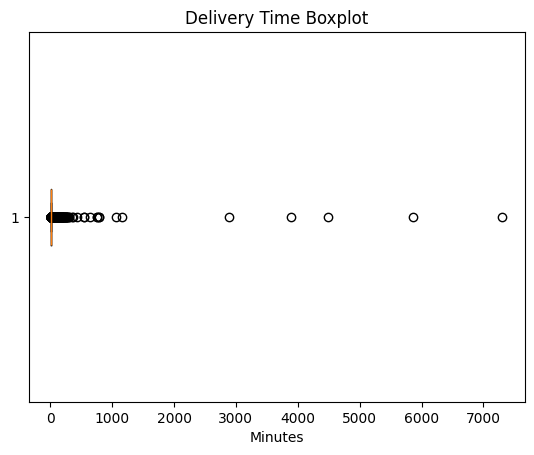

In [13]:
# Outlier Detection

plt.figure()
plt.boxplot(df['delivery_time_mints'], vert=False)
plt.title("Delivery Time Boxplot")
plt.xlabel("Minutes")
plt.show()

In [14]:
# Outlier Treatment

df_clean = df[df['delivery_time_mints'] <= 120]
df_clean.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_mints
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [15]:
# Recalculating the SLA Afer Cleaning

p95_clean = df_clean['delivery_time_mints'].quantile(0.95)
p95_clean

np.float64(26.247372241666667)

### Univariate Analysis (Delivery Time)

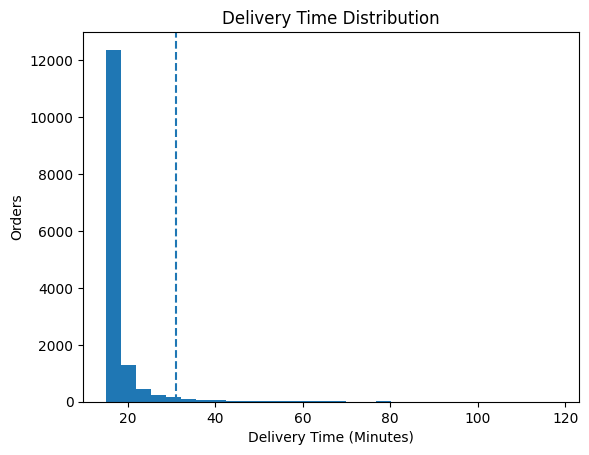

In [16]:
# Histogram

plt.figure()
plt.hist(df_clean['delivery_time_mints'], bins=30)
plt.axvline(31, linestyle='--')
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Orders")
plt.title("Delivery Time Distribution")
plt.show()

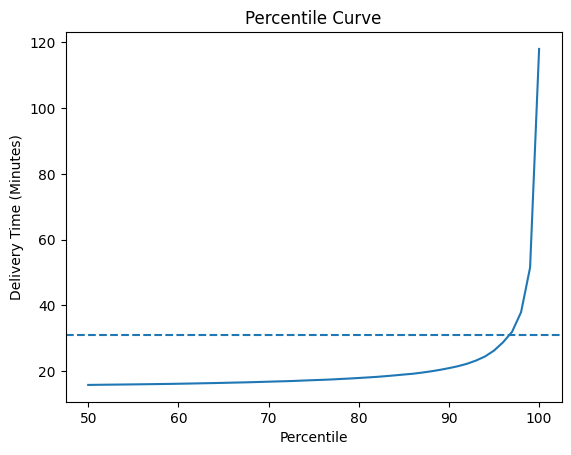

In [17]:
# Percentile Curve

percentiles = np.percentile(
    df_clean['delivery_time_mints'], 
    range(50, 101)
)

plt.figure()
plt.plot(range(50, 101), percentiles)
plt.axhline(31, linestyle='--')
plt.xlabel("Percentile")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Percentile Curve")
plt.show()

### SLA Breach Analysis

In [18]:
df_clean['sla_breach'] = df_clean['delivery_time_mints'] > 31

breach_rate = df_clean['sla_breach'].mean() * 100
breach_rate

np.float64(3.2683678253298507)

In [19]:
# Identify Problem Orders

late_orders = df_clean[df_clean['sla_breach']]
late_orders.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_mints,sla_breach
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,True
47,1523158,2023-03-01 01:57:16,2023-03-01 02:30:19.851911,33.064199,True
174,1523285,2023-03-01 07:22:11,2023-03-01 08:12:51.906470,50.681774,True
261,1523372,2023-03-01 11:20:21,2023-03-01 12:01:21.359545,41.005992,True
272,1523383,2023-03-01 11:48:29,2023-03-01 12:30:57.713993,42.478567,True


In [20]:
# Time-Based Analysis

df_clean['hour'] = df_clean['order_placed_at'].dt.hour
df_clean['day'] = df_clean['order_placed_at'].dt.day_name()

In [21]:
df_clean.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_mints,sla_breach,hour,day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,False,0,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,False,0,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,False,0,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,True,0,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,False,0,Wednesday


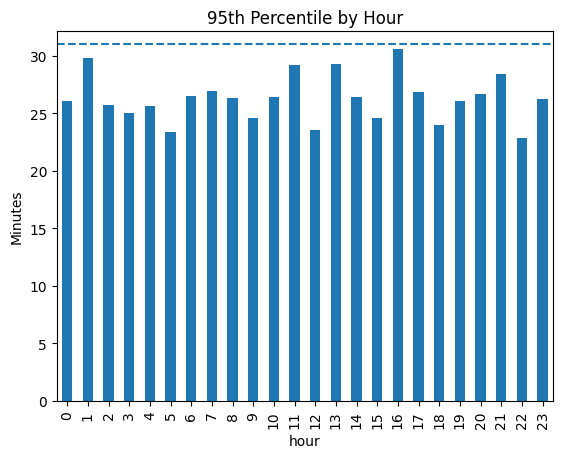

In [22]:
# 95th Percentile by Hour

hourly_p95 = df_clean.groupby('hour')['delivery_time_mints'].quantile(0.95)

plt.figure()
hourly_p95.plot(kind='bar')
plt.axhline(31, linestyle='--')
plt.title("95th Percentile by Hour")
plt.ylabel("Minutes")
plt.show()


In [23]:
# 95th Percentile by Day

day_p95 = df_clean.groupby('day')['delivery_time_mints'].quantile(0.95)
day_p95


day
Friday       25.498189
Monday       27.480235
Saturday     26.384227
Sunday       24.879806
Thursday     26.119070
Tuesday      28.292172
Wednesday    25.539056
Name: delivery_time_mints, dtype: float64

In [24]:
# Business Summary Table

summary = {
    "Total Orders": len(df_clean),
    "Avg Delivery Time": df_clean['delivery_time_mints'].mean(),
    "95th Percentile": p95_clean,
    "SLA Breach %": breach_rate
}

pd.DataFrame(summary, index=["Value"])


,Total Orders,Avg Delivery Time,95th Percentile,SLA Breach %
Value,14931,17.760636,26.247372,3.268368


### Final Conclusion

In [25]:
print(f"""
SLA Evaluation Summary
---------------------
Average Delivery Time : {df_clean['delivery_time_mints'].mean():.2f} mins
95th Percentile       : {p95_clean:.2f} mins
SLA Limit             : 31 mins
SLA Breach Rate       : {breach_rate:.2f} %
""")



SLA Evaluation Summary
---------------------
Average Delivery Time : 17.76 mins
95th Percentile       : 26.25 mins
SLA Limit             : 31 mins
SLA Breach Rate       : 3.27 %



In [27]:
df['hour'] = df['order_placed_at'].dt.hour 
df['day_of_week'] = df['order_placed_at'].dt.day_name()
avg_by_hour = df.groupby('hour')['delivery_duration'].mean() 
plt.figure(figsize=(12,6)) 
sns.lineplot(x=avg_by_hour.index, y=avg_by_hour.values, marker='o') 
plt.axhline(31, color='red', linestyle='--', label='31 min cutoff') 
plt.title("Average Delivery Duration by Hour of Day") 
plt.xlabel("Hour of Day") 
plt.ylabel("Average Delivery Duration (minutes)") 
plt.legend() 
plt.show()

KeyError: 'Column not found: delivery_duration'